# 27. HEPTA CLUSTER: DATA EXPLORATION
---

## 1. Introducing the Data
- **Source**: Ultsch, A.: Clustering with SOM: U*C,
    - In Proc. Workshop on Self-Organizing Maps, Paris, France, 2005, 75-82.

    - Web: https://www.uni-marburg.de/fb12/arbeitsgruppen/datenbionik/data

    - One of the datasets in the Fundamental Clustering Problems Suite (FCPS).

    - `labels0` come from the Author. `0` denotes the noise class (if present).
- **Downloaded from:** https://github.com/gagolews/clustering_benchmarks_v1/tree/master/fcps

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

hepta_cols = ['col1', 'col2', 'col3']
hepta = pd.read_csv('data/hepta.data.gz', 
                    delimiter="\t", header=None)
noise = pd.read_csv('data/hepta.labels0.gz', 
                    delimiter="\t", header=None)
hepta.columns = hepta_cols
hepta['labels'] = noise
print(hepta.shape)
hepta.head()

(212, 4)


,col1,col2,col3,labels
0,-6.327e-02,0.028,0.023,1
1,-7.310e-04,0.048,0.069,1
2,-6.077e-02,-0.009,0.053,1
3,1.325e-02,-0.012,0.055,1
4,-5.451e-02,-0.004,0.002,1


## 2. Understanding Data Types

In [3]:
hepta.isnull().sum()

col1      0
col2      0
col3      0
labels    0
dtype: int64

In [4]:
hepta.dtypes.value_counts()

float64    3
int64      1
dtype: int64

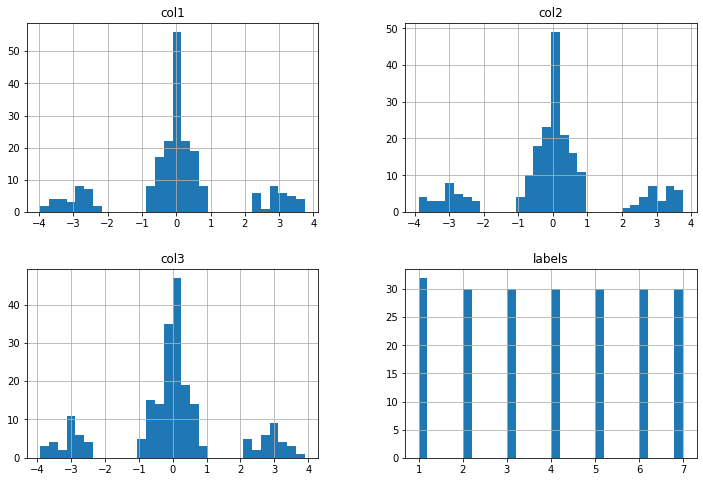

In [6]:
import matplotlib.pyplot as plt

hepta.hist(bins=30, figsize=(12,8))
plt.show()

So the first 3 columns seem to be very simillar, with minor virations:
- There are centered at around zero,
- They seem to be almost symmetrical
- There two empty spaces roughly between -2 and -1 and between 1 and 2

The first 3 columns are continuous, while our label column is nominal. 
- The categories in the label column seem to have the same number of entries except for category 1, which presumably has 32 entries while others have 30 each

## 3. Looking into the Basic Stats

In [12]:
hepta_stats = hepta.describe().T
hepta_stats['max-min'] = hepta.max()-hepta.min()
hepta_stats

,count,mean,std,min,25%,50%,75%,max,max-min
col1,212.0,0.015,1.648,-3.970,-0.407,-0.004,0.439,3.748,7.718
col2,212.0,0.034,1.671,-3.881,-0.477,-0.005,0.501,3.774,7.656
col3,212.0,-0.036,1.629,-3.909,-0.423,0.021,0.384,3.899,7.809
labels,212.0,3.972,2.016,1.000,2.000,4.000,6.000,7.000,6.000


It looks like our feature columns seem to have their data in similar ranges. They also seem to show the symmetry mentioned above.
## 4. Checking for Outliers

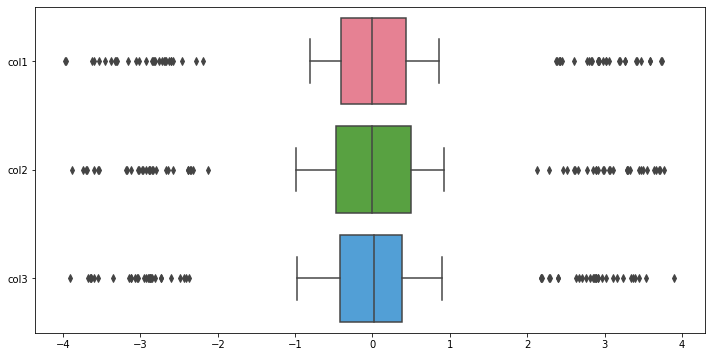

In [17]:
import seaborn as sns

hepta_n = hepta.drop('labels', axis=1)
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=hepta_n, orient="h", palette="husl")

There are a lot of outliers but that might not be an issue since our main goal is to cluster the data into simillar groups. The symmetry is still observable even in the plot above. 

## 5. Exploring Correlation

<AxesSubplot:>

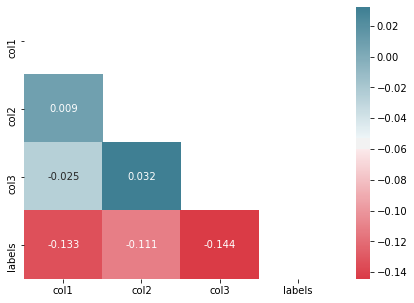

In [21]:
corr_mx = hepta.corr()
mask = np.triu(np.ones_like(corr_mx, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr_mx, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})

There is no correlation whatsoever!
## 6. Data Visualization

<AxesSubplot:xlabel='col1', ylabel='col2'>

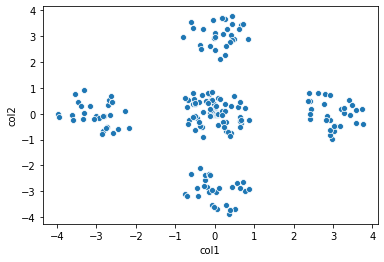

In [33]:
sns.scatterplot(data=hepta, x="col1", y="col2")

<AxesSubplot:xlabel='col1', ylabel='col3'>

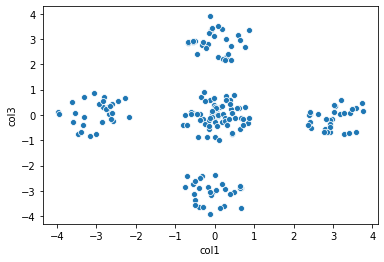

In [27]:
sns.scatterplot(data=hepta, x="col1", y="col3")

<AxesSubplot:xlabel='col3', ylabel='col2'>

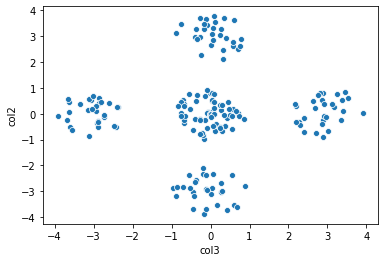

In [28]:
sns.scatterplot(data=hepta, x="col3", y="col2")

The scatterplots are showing 5 clusters. 